In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

from acse_9_irp_wafflescore import MiscHelpers as mh
from acse_9_irp_wafflescore import FCMHelpers as fh
from acse_9_irp_wafflescore import dataPreprocessing as dp

import numpy as np

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

# Tested with model with smaller anomaly (M5b)

In [2]:
model = 'M5b'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)


2019-08-29 01:13:21,219 | INFO : FCM elapsed time: 31.173336
2019-08-29 01:13:22,296 | INFO : sil=0.172184, chs=1929.320473
2019-08-29 01:14:02,528 | INFO : FCM elapsed time: 40.230883
2019-08-29 01:14:03,190 | INFO : sil=0.151130, chs=1808.564374
2019-08-29 01:14:57,601 | INFO : FCM elapsed time: 54.409866
2019-08-29 01:14:58,390 | INFO : sil=0.119506, chs=1583.289241
2019-08-29 01:16:09,206 | INFO : FCM elapsed time: 70.814944
2019-08-29 01:16:10,157 | INFO : sil=0.124629, chs=1456.324267
2019-08-29 01:17:34,569 | INFO : FCM elapsed time: 84.409843
2019-08-29 01:17:35,424 | INFO : sil=0.102822, chs=1328.575974
2019-08-29 01:19:18,393 | INFO : FCM elapsed time: 102.965751
2019-08-29 01:19:19,345 | INFO : sil=0.017464, chs=1219.459226
2019-08-29 01:21:18,142 | INFO : FCM elapsed time: 118.794697
2019-08-29 01:21:18,951 | INFO : sil=0.085817, chs=1164.846080
2019-08-29 01:23:43,530 | INFO : FCM elapsed time: 144.577305
2019-08-29 01:23:44,234 | INFO : sil=0.101296, chs=1367.807880
2019-

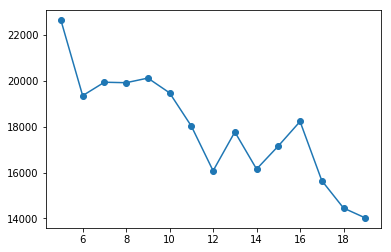

In [4]:
n_classes = range(5, 20)
fcms, pred_mems, SSE, avg_sils, ch_scs, best_idx = fh.iter_n_class(norm_data, n_classes)

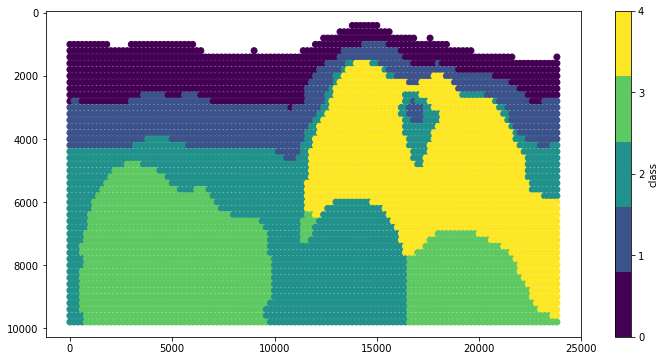

In [5]:
for i, p in enumerate(pred_mems):
    if(i in best_idx):
        fh.plot_best_fuzz(p, x, z)

In [19]:
mh.save_model(fcms, 'fcm_PT_M5b.p')
mh.save_model(pred_mems, 'fcm_PT_M5b_pred.npy')

Model saved at: fcm_PT_M5b.p
Model saved at: fcm_PT_M5b_pred.npy


# Tested with model with higher anomaly (M5a)


In [9]:
model = 'M5a'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

2019-08-29 01:53:41,635 | INFO : FCM elapsed time: 29.052648
2019-08-29 01:53:42,347 | INFO : sil=0.120144, chs=1470.621842
2019-08-29 01:54:21,591 | INFO : FCM elapsed time: 39.243220
2019-08-29 01:54:22,255 | INFO : sil=0.177840, chs=1536.312720
2019-08-29 01:55:12,002 | INFO : FCM elapsed time: 49.746386
2019-08-29 01:55:12,670 | INFO : sil=0.152550, chs=1408.862772
2019-08-29 01:56:18,390 | INFO : FCM elapsed time: 65.718961
2019-08-29 01:56:18,987 | INFO : sil=0.135346, chs=1248.935428
2019-08-29 01:57:41,556 | INFO : FCM elapsed time: 82.567848
2019-08-29 01:57:42,187 | INFO : sil=0.154665, chs=1155.171896
2019-08-29 01:59:21,049 | INFO : FCM elapsed time: 98.860599
2019-08-29 01:59:21,768 | INFO : sil=0.177873, chs=1274.901923
2019-08-29 02:01:15,216 | INFO : FCM elapsed time: 113.445700
2019-08-29 02:01:15,811 | INFO : sil=0.133581, chs=964.181721
2019-08-29 02:03:38,532 | INFO : FCM elapsed time: 142.718939
2019-08-29 02:03:39,220 | INFO : sil=0.126006, chs=963.872256
2019-08-

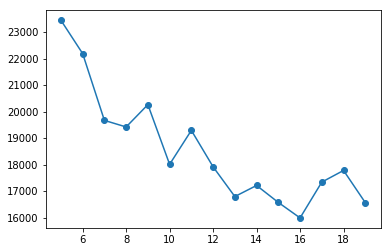

In [7]:
n_classes = range(5, 20)
fcms_2, pred_mems_2, SSE_2, avg_sils_2, ch_scs_2, best_idx_2 = fh.iter_n_class(norm_data, n_classes)

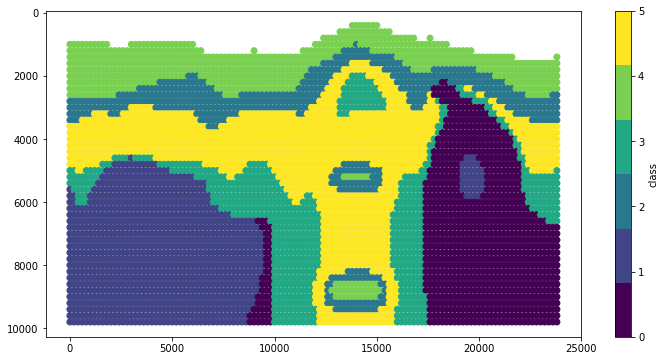

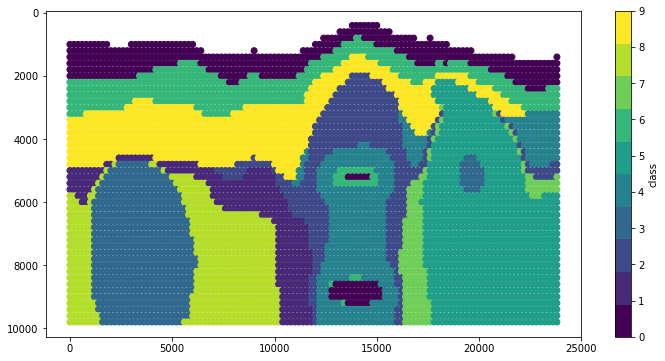

In [8]:
for i, p in enumerate(pred_mems_2):
    if(i in best_idx_2):
        fh.plot_best_fuzz(p, x, z)

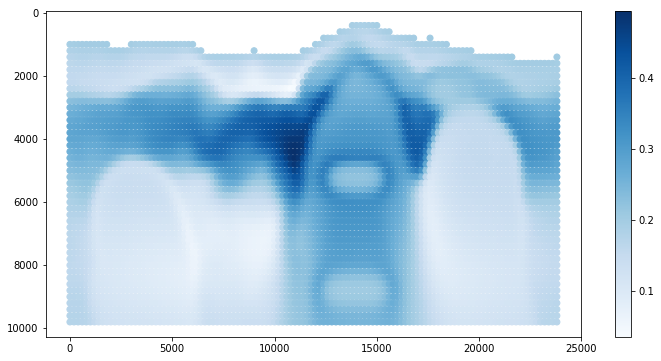

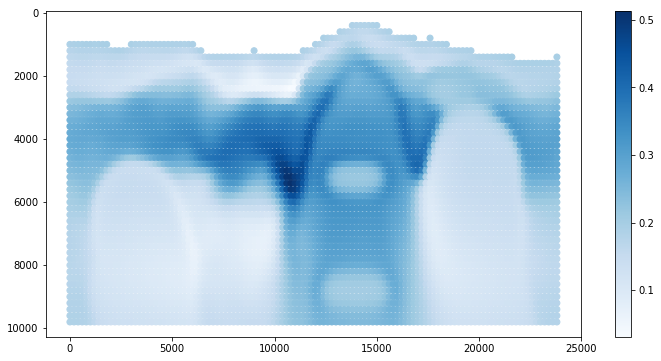

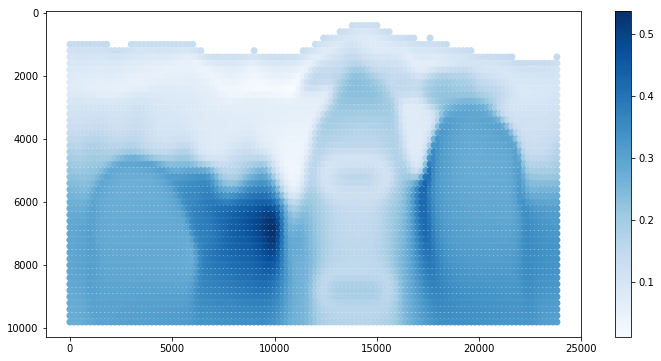

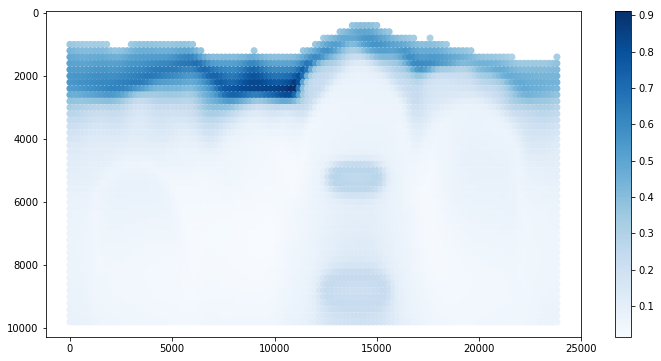

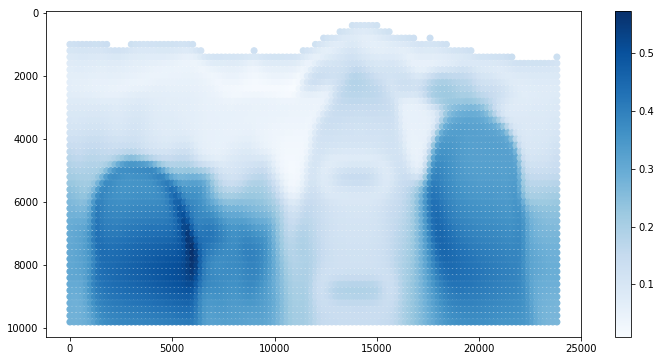

In [12]:
fh.plot_fcm(pred_mems_2[0], x, z)

In [18]:
mh.save_model(fcms_2, 'fcm_PT_M5a.p')
mh.save_model(pred_mems_2, 'fcm_PT_M5a_pred.npy')

Model saved at: fcm_PT_M5a.p
Model saved at: fcm_PT_M5a_pred.npy
